In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve,precision_recall_curve,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [2]:
df=pd.read_csv('Crop_recommendation.csv')
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [3]:
df.shape

(2200, 8)

In [4]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
df.label.value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [9]:
number_unique_crops=len(df['label'].unique())
print(number_unique_crops)

22


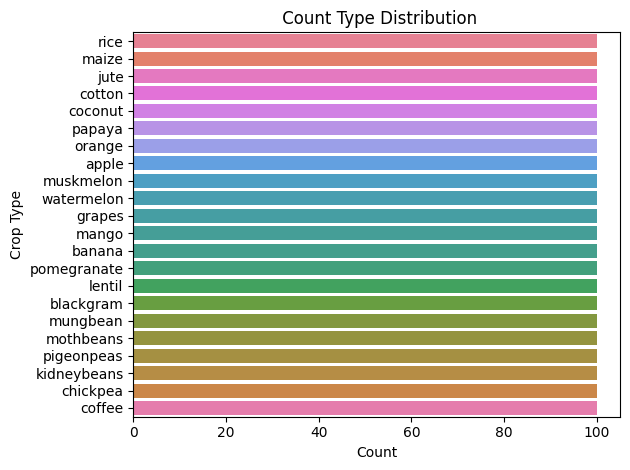

In [10]:
sns.countplot(y='label',data=df,order=df['label'].value_counts().index,hue=df['label'])
plt.title(' Count Type Distribution')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

In [11]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
r=[]

features=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for f in features:
    min_value=df[f].min()
    max_value=df[f].max()
    r.append((f,min_value,max_value))
    print(f'{f} - Min_value :{min_value}, Max_value :{max_value}')

N - Min_value :0, Max_value :140
P - Min_value :5, Max_value :145
K - Min_value :5, Max_value :205
temperature - Min_value :8.825674745, Max_value :43.67549305
humidity - Min_value :14.25803981, Max_value :99.98187601
ph - Min_value :3.504752314, Max_value :9.93509073
rainfall - Min_value :20.21126747, Max_value :298.5601175


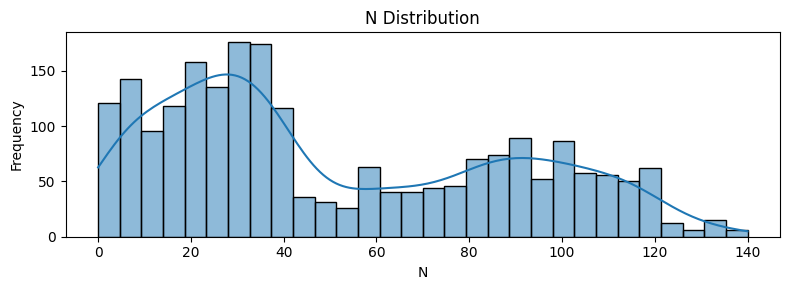

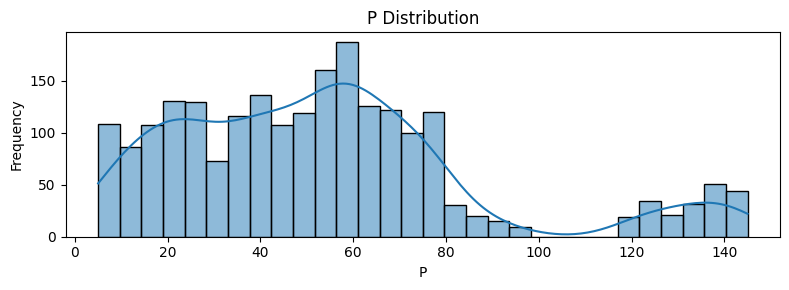

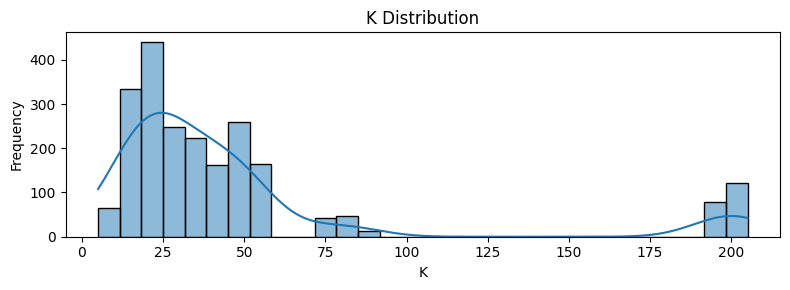

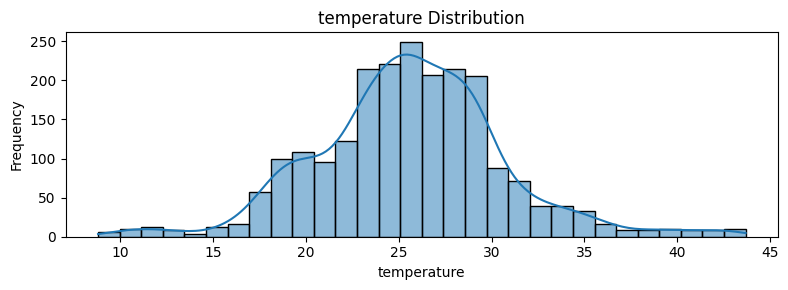

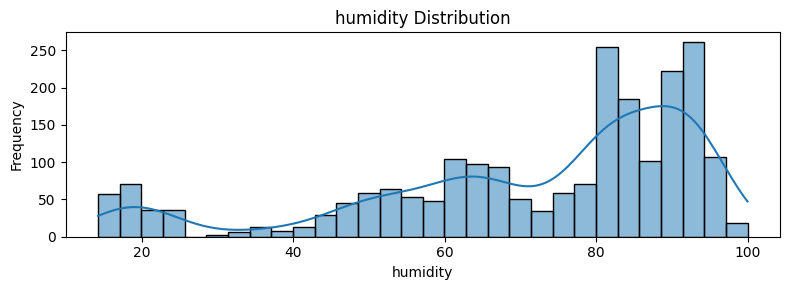

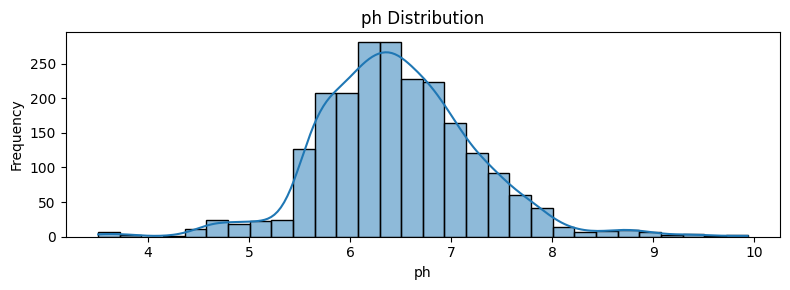

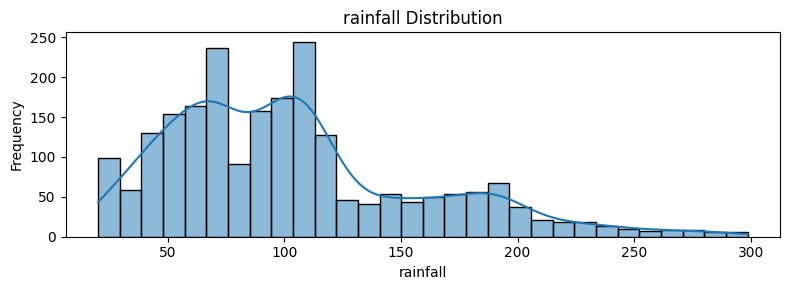

In [13]:
features=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for feature in features:
    # plt.subplot(3,2,1)
    plt.figure(figsize=(8,3))
    sns.histplot(df[feature],kde=True,bins=30)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')
    plt.tight_layout()
    plt.show()
    

In [14]:
df.label.unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

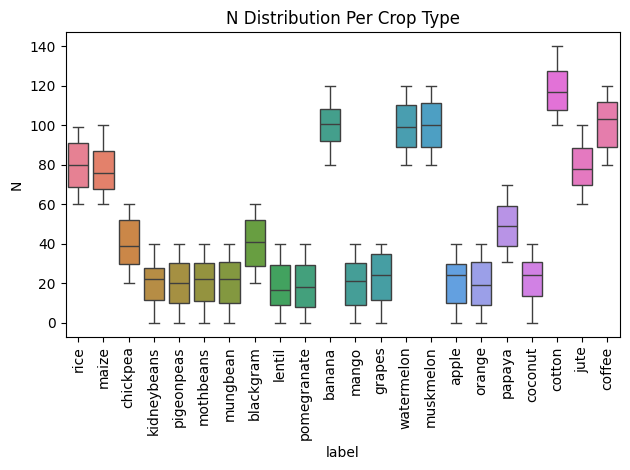

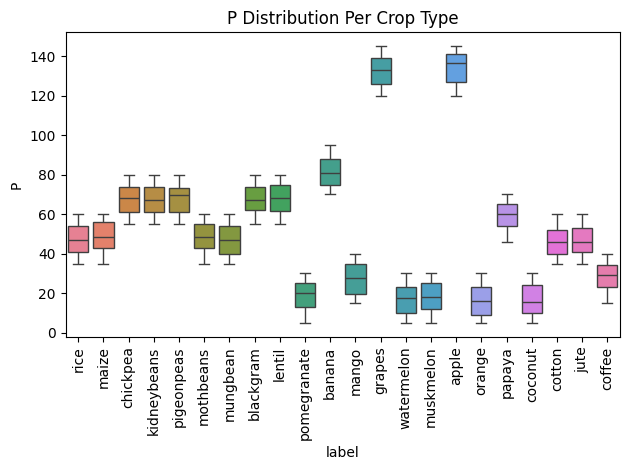

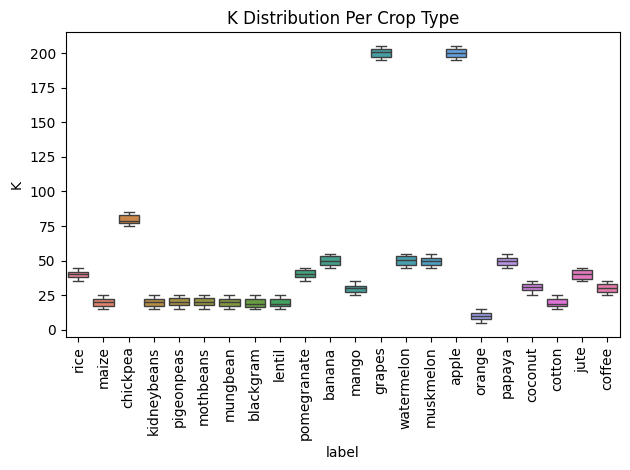

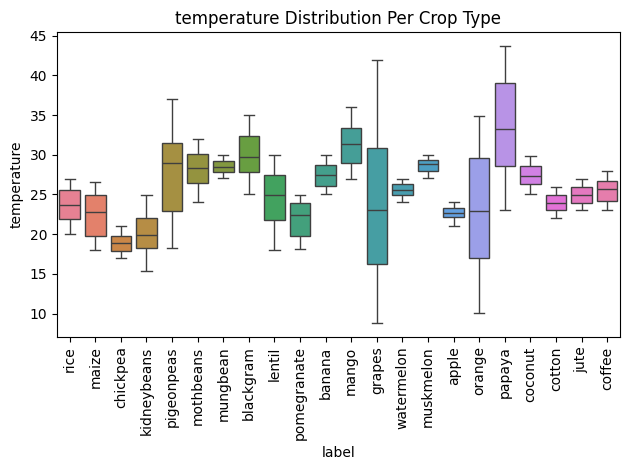

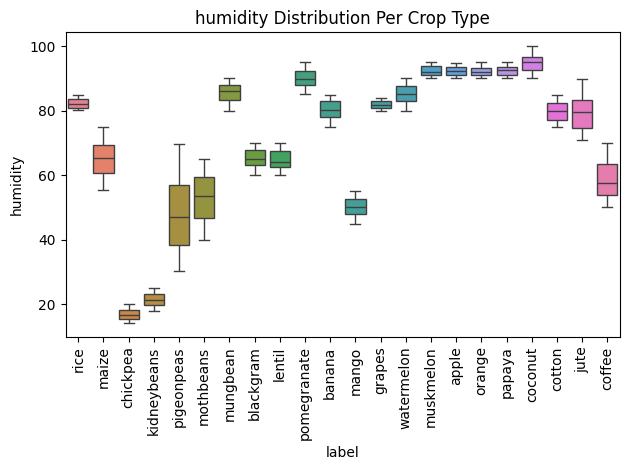

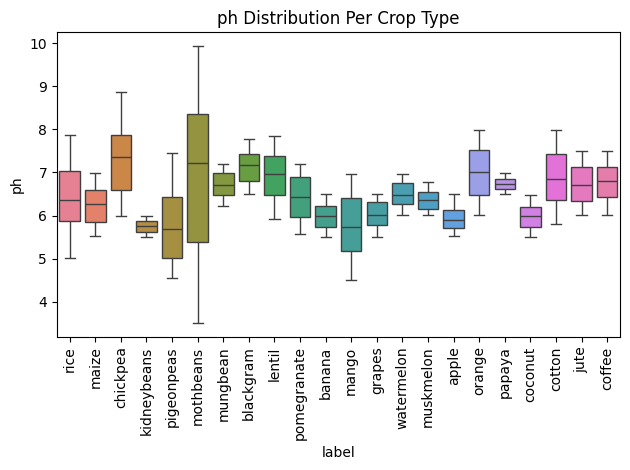

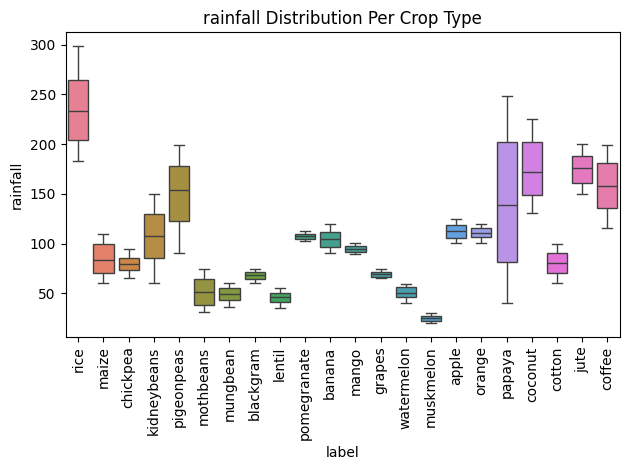

In [15]:
for feature in features:
    sns.boxplot(data=df,x='label',y=feature,hue='label')
    plt.xticks(rotation=90)
    plt.title(f'{feature} Distribution Per Crop Type')
    plt.tight_layout()
    plt.show()

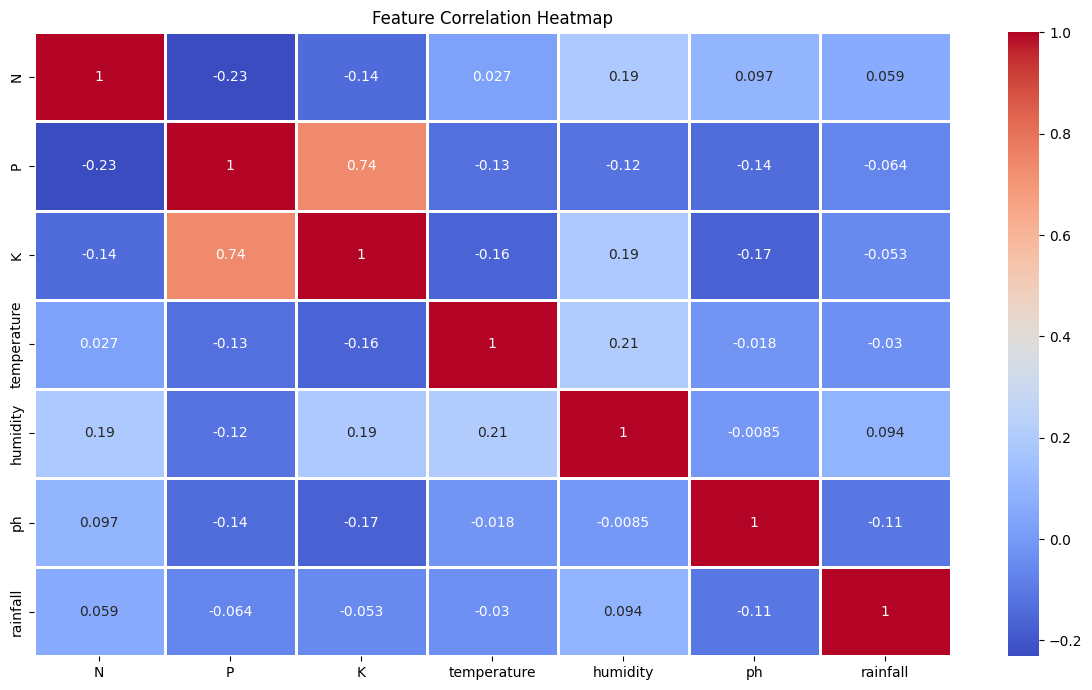

In [16]:
correlation_matrix=df.corr(numeric_only=True)
# print(correlation_matrix)
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [17]:
skewed_features=df[features].skew().sort_values(ascending=False)
print('skewness of features :\n',skewed_features)

skewness of features :
 K              2.375167
P              1.010773
rainfall       0.965756
N              0.509721
ph             0.283929
temperature    0.184933
humidity      -1.091708
dtype: float64


In [18]:
le=LabelEncoder()
df['encoded_label']=le.fit_transform(df['label'])

In [19]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label',
       'encoded_label'],
      dtype='object')

In [20]:
x=df.drop(['label','encoded_label'],axis=1)
y=df['encoded_label']
# x=df.drop(['label'],axis=1)
# y_rf=df['label']

In [21]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.2,random_state=42,stratify=y)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

print("Train_shape :",x_train.shape)
print("Test_shape : ",x_test.shape)

Train_shape : (1760, 7)
Test_shape :  (440, 7)


In [22]:
with open ('Standard_Scaler_features.pkl','wb') as file:
    pickle.dump(scaler,file)
with open('labelencoded_targetclass.pkl','wb') as file:
    pickle.dump(le,file)

In [23]:
class_names=le.classes_
print(' Feature Class Label(encoded):',list(enumerate(class_names)))

 Feature Class Label(encoded): [(0, 'apple'), (1, 'banana'), (2, 'blackgram'), (3, 'chickpea'), (4, 'coconut'), (5, 'coffee'), (6, 'cotton'), (7, 'grapes'), (8, 'jute'), (9, 'kidneybeans'), (10, 'lentil'), (11, 'maize'), (12, 'mango'), (13, 'mothbeans'), (14, 'mungbean'), (15, 'muskmelon'), (16, 'orange'), (17, 'papaya'), (18, 'pigeonpeas'), (19, 'pomegranate'), (20, 'rice'), (21, 'watermelon')]


In [24]:
models ={
    'LogisticRegression': LogisticRegression(max_iter=200),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(kernel='rbf', probability=True),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}
results=[]

In [25]:
for name,model in models.items():
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,pred)
    # train_accuracy=model.score(x_train,y_train)
    precision=precision_score(y_test,pred,average='macro')
    recall=recall_score(y_test,pred,average='macro')
    f1=f1_score(y_test,pred,average='macro')
    results.append((name,accuracy,precision,recall,f1))
    print(f"{name} Accuracy :{accuracy :.4f} ,precision :{precision : .4f}, recall: {recall :.4f}, f1 :{f1 :.4f}")

LogisticRegression Accuracy :0.9727 ,precision : 0.9740, recall: 0.9727, f1 :0.9725


Random Forest Accuracy :0.9955 ,precision : 0.9957, recall: 0.9955, f1 :0.9955
Decision Tree Accuracy :0.9795 ,precision : 0.9806, recall: 0.9795, f1 :0.9794
Naive Bayes Accuracy :0.9955 ,precision : 0.9959, recall: 0.9955, f1 :0.9954
KNN Accuracy :0.9705 ,precision : 0.9728, recall: 0.9705, f1 :0.9702
SVM Accuracy :0.9841 ,precision : 0.9856, recall: 0.9841, f1 :0.9840
Gradient Boosting Accuracy :0.9886 ,precision : 0.9897, recall: 0.9886, f1 :0.9887
XGBoost Accuracy :0.9932 ,precision : 0.9935, recall: 0.9932, f1 :0.9931


In [26]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)
num_classes=y_train_cat.shape[1]
print(num_classes)

22


# Deep Learning - Artificial Neural Network (ANN)

In [27]:
def create_model(n_hidden_layer,n_neurons,dropout_rate,learning_rate,activation_fun):
    model=Sequential()
    model.add(Input(shape=(x_train.shape[1],)))
    for i in range(n_hidden_layer):
        model.add(Dense(n_neurons,activation=activation_fun))
        if dropout_rate >0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(22,activation='softmax'))
    optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss=tf.keras.losses.CategoricalCrossentropy()
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
    return model
keras_classifier=KerasClassifier(
    model=create_model,
    verbose=1,
    epochs=50,
    batch_size=32)
params={'model__n_hidden_layer':[1,2],
        'model__n_neurons':[15,20,30,40],
        'model__dropout_rate':[.1,.2,.3],
        'model__learning_rate':[0.01,.02,.03],
        'model__activation_fun':['relu','leaky_relu'],
        'epochs':[25,50,60],
        'batch_size':[32,64,75,100],
         }      
early_stopping=EarlyStopping(
    monitor='val_loss',
    
    patience=10,
    restore_best_weights=True
)
random_search=RandomizedSearchCV(
    estimator=keras_classifier,
    param_distributions=params,
    n_iter=10,
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,
    verbose=2
)
# grid_search=GridSearchCV(
#     estimator=keras_classifier,
#     param_grid=params,
#     cv=3,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )
print('\n starting hypoerparameter tuning')
random_search.fit(x_train,y_train_cat,callbacks=[early_stopping],validation_split=0.2)

print("\nhyperparameter Tuning Completed")
print(f'Best Parameter found :{random_search.best_params_}')
print(f'Best cross_validation_accuracy:{random_search.best_score_ :.4f}')
best_model_ann=random_search.best_estimator_
test_loss,test_acccuracy=best_model_ann.model_.evaluate(x_test,y_test_cat,verbose=0)
print(f'Test accuracy of the best model: { test_acccuracy: .4f}')



 starting hypoerparameter tuning
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Epoch 1/50


15/15 [==============================] - 4s 62ms/step - loss: 1.7013 - accuracy: 0.5149 - val_loss: 0.5709 - val_accuracy: 0.8523
Epoch 2/50
15/15 [==============================] - 0s 16ms/step - loss: 0.4934 - accuracy: 0.8310 - val_loss: 0.2308 - val_accuracy: 0.9489
Epoch 3/50
15/15 [==============================] - 0s 16ms/step - loss: 0.2695 - accuracy: 0.9077 - val_loss: 0.1386 - val_accuracy: 0.9688
Epoch 4/50
15/15 [==============================] - 0s 15ms/step - loss: 0.2436 - accuracy: 0.9155 - val_loss: 0.1353 - val_accuracy: 0.9631
Epoch 5/50
15/15 [==============================] - 0s 14ms/step - loss: 0.1935 - accuracy: 0.9332 - val_loss: 0.1130 - val_accuracy: 0.9574
Epoch 6/50
15/15 [==============================] - 0s 15ms/step - loss: 0.1606 - accuracy: 0.9403 - val_loss: 0.1132 - val_accuracy: 0.9631
Epoch 7/50
15/15 [==============================] - 0s 1

In [28]:
# Best Parameter found :{'model__n_neurons': 40, 'model__n_hidden_layer': 1, 'model__learning_rate': 0.03, 'model__dropout_rate': 0.1, 'model__activation_fun': 'relu', 'epochs': 50, 'batch_size': 100}

In [40]:
best_ann_model=Sequential(
    [Dense(40,input_shape=(x_train.shape[1],),activation='relu'),
    Dropout(0.1),
    Dense(22,activation='softmax')])
optimizer=tf.keras.optimizers.Adam(learning_rate=0.03)
loss=tf.keras.losses.CategoricalCrossentropy()
best_ann_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
history=best_ann_model.fit(x_train,y_train_cat,callbacks=[early_stopping_callback],epochs=50,batch_size=100,validation_split=0.2,verbose=2)
test_loss,test_accuracy_best= best_ann_model.evaluate(x_test,y_test_cat,verbose=0)

print(f'ANN_Best_model_accuracy : {test_accuracy_best : .4f}')

Epoch 1/50
15/15 - 1s - loss: 1.7889 - accuracy: 0.5362 - val_loss: 0.5636 - val_accuracy: 0.8807 - 978ms/epoch - 65ms/step
Epoch 2/50
15/15 - 0s - loss: 0.4899 - accuracy: 0.8352 - val_loss: 0.2079 - val_accuracy: 0.9602 - 139ms/epoch - 9ms/step
Epoch 3/50
15/15 - 0s - loss: 0.2496 - accuracy: 0.9190 - val_loss: 0.1244 - val_accuracy: 0.9659 - 119ms/epoch - 8ms/step
Epoch 4/50
15/15 - 0s - loss: 0.1888 - accuracy: 0.9304 - val_loss: 0.1254 - val_accuracy: 0.9631 - 131ms/epoch - 9ms/step
Epoch 5/50
15/15 - 0s - loss: 0.1673 - accuracy: 0.9361 - val_loss: 0.1077 - val_accuracy: 0.9574 - 131ms/epoch - 9ms/step
Epoch 6/50
15/15 - 0s - loss: 0.1376 - accuracy: 0.9574 - val_loss: 0.0751 - val_accuracy: 0.9773 - 108ms/epoch - 7ms/step
Epoch 7/50
15/15 - 0s - loss: 0.1298 - accuracy: 0.9538 - val_loss: 0.0831 - val_accuracy: 0.9688 - 96ms/epoch - 6ms/step
Epoch 8/50
15/15 - 0s - loss: 0.1175 - accuracy: 0.9581 - val_loss: 0.0710 - val_accuracy: 0.9659 - 104ms/epoch - 7ms/step
Epoch 9/50
15/15

In [30]:
best_ann_model=random_search.best_estimator_.model_
test_loss,test_accuracy= best_ann_model.evaluate(x_test,y_test_cat,verbose=0)
print(f'ANN_Best_model_accuracy : {test_accuracy : .4f}')

ANN_Best_model_accuracy :  0.9795


In [31]:
print(random_search.best_estimator_.model_)

Evaluation of Best ML Model (Random Forest used here)


In [32]:
best_model=RandomForestClassifier(n_estimators=100,random_state=42)
best_model.fit(x_train,y_train)
y_pred_rf=best_model.predict(x_test)

print(accuracy_score(y_test,y_pred_rf))


0.9954545454545455


In [43]:

with open ('Random_Classifier_Model.pkl','wb') as file:
    pickle.dump(best_model,file)

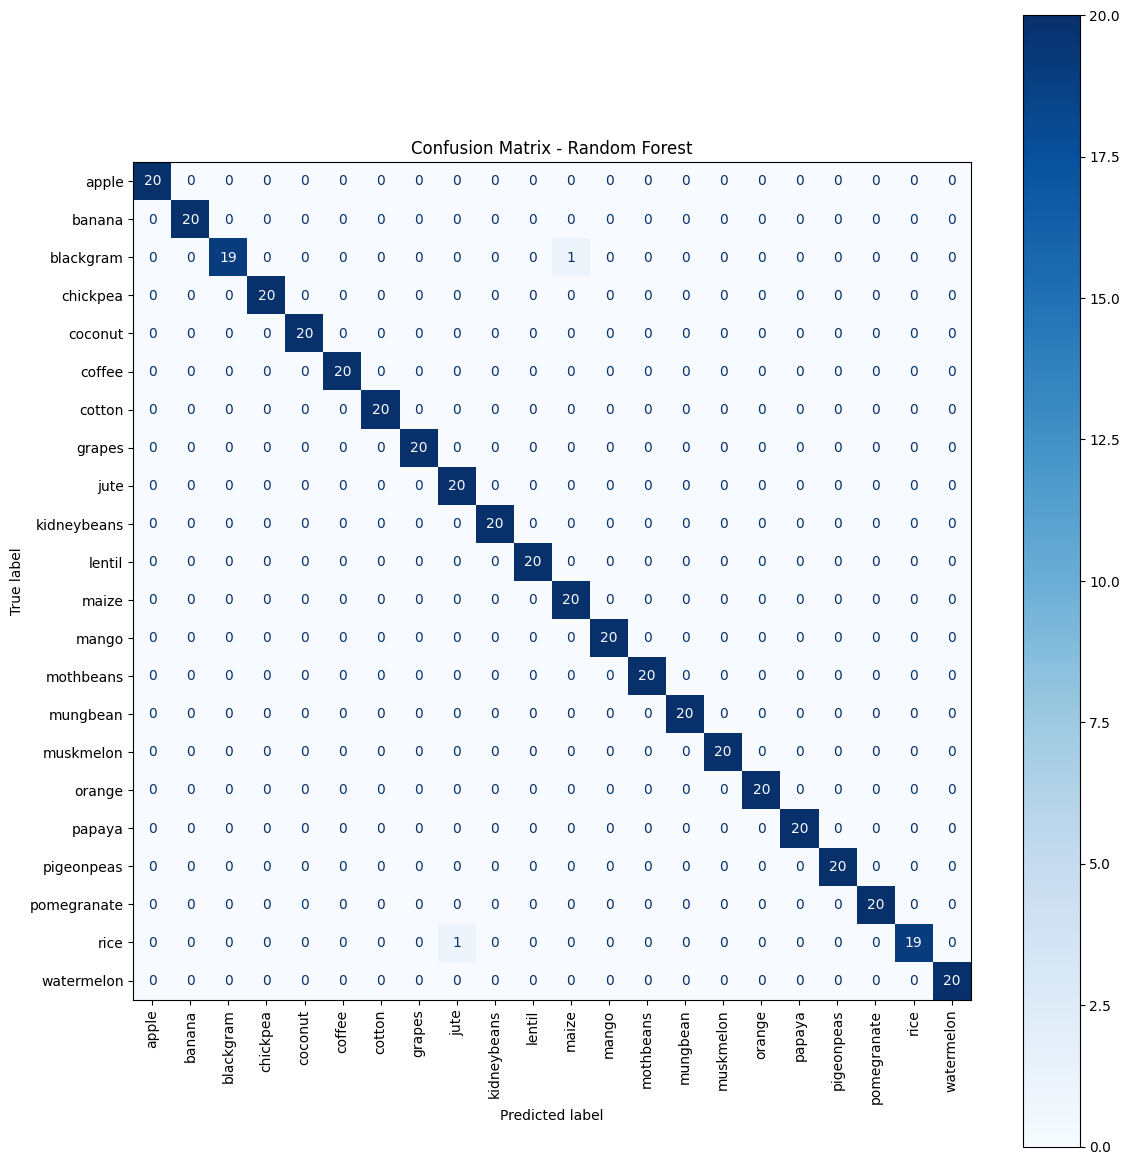

In [34]:
cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
fig,ax=plt.subplots(figsize=(12,12))
disp.plot(ax=ax,cmap='Blues',xticks_rotation=90)
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()



In [35]:
print('Classification Reprt -Random Forest :\n')
print(classification_report(y_test,y_pred_rf,target_names=class_names))

Classification Reprt -Random Forest :

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.0

Feature Importance with Random Forest

## Retrieve feature importances

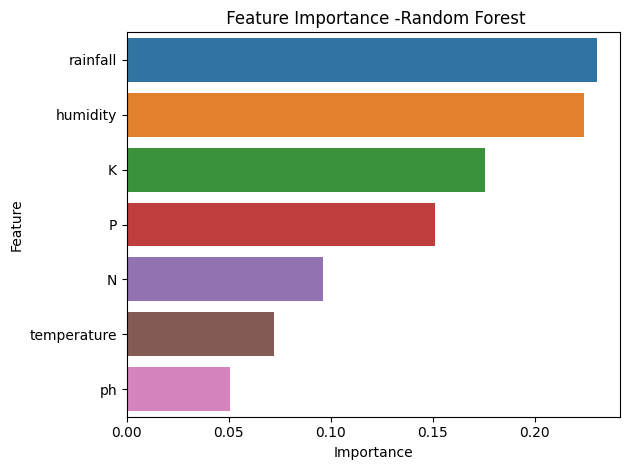

In [36]:
importances=best_model.feature_importances_
feature_importance_df=pd.DataFrame({
    'Feature':features,
    "Importance" :importances
}).sort_values(by='Importance',ascending=False)
sns.barplot(x='Importance',y="Feature",data=feature_importance_df,hue='Feature')
plt.title(' Feature Importance -Random Forest')
plt.tight_layout()
plt.show()

Top 3 most important features

In [37]:
print('Top 3 Important Features')
print(feature_importance_df.head(3))

Top 3 Important Features
    Feature  Importance
6  rainfall    0.230184
4  humidity    0.224227
2         K    0.175393


# Final Model Comparison (ML + ANN)

## Recreate model accuracy results list

In [41]:

results = [
    ("Logistic Regression", LogisticRegression(max_iter=200).fit(x_train, y_train).score(x_test, y_test)),
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42).fit(x_train, y_train).score(x_test, y_test)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42).fit(x_train, y_train).score(x_test, y_test)),
    ("Naive Bayes", GaussianNB().fit(x_train, y_train).score(x_test, y_test)),
    ("KNN", KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train).score(x_test, y_test)),
    ("SVM", SVC(kernel='rbf', probability=True).fit(x_train, y_train).score(x_test, y_test)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42).fit(x_train, y_train).score(x_test, y_test)),
    ("XGBoost", XGBClassifier(eval_metric='mlogloss', random_state=42).fit(x_train, y_train).score(x_test, y_test)),
    ("Artificial Neural Network", test_accuracy_best)
]
results_df=pd.DataFrame(results,columns=["Model","Accuracy"]).sort_values(by='Accuracy',ascending=False)
print(results_df)

                       Model  Accuracy
1              Random Forest  0.995455
3                Naive Bayes  0.995455
7                    XGBoost  0.993182
8  Artificial Neural Network  0.988636
6          Gradient Boosting  0.988636
5                        SVM  0.984091
2              Decision Tree  0.979545
0        Logistic Regression  0.972727
4                        KNN  0.970455


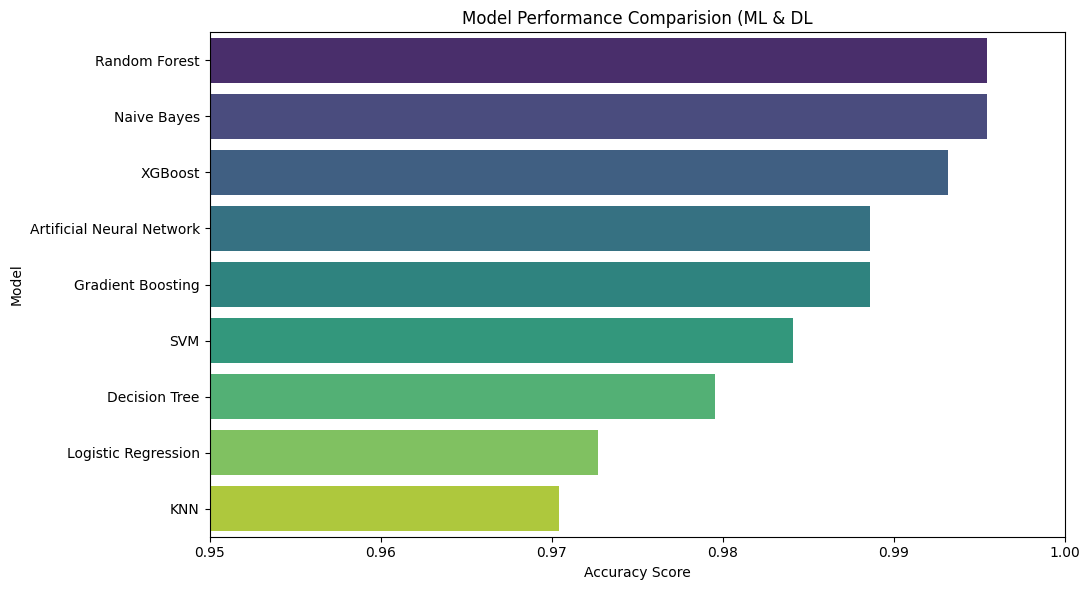

In [42]:
plt.figure(figsize=(11,6))
sns.barplot(x='Accuracy',y='Model',data=results_df,palette='viridis',hue='Model')
plt.title('Model Performance Comparision (ML & DL')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0.95,1)
plt.tight_layout()
plt.show()